In [1]:
%pylab inline
import os
import os.path
import pytest
import os.path as op
import sys
import matplotlib.pyplot as plt
import scipy
import glob
from pathlib import Path

sys.path.insert(0,str(Path("~/projects/io3d").expanduser()))

# import imtools.trainer3d
# import imtools.datasets
# import imtools.ml
import itertools
import io3d
from loguru import logger
# import bodynavigation
# logger.disable("io3d")
logger.remove()
logger.add(sys.stderr, level='INFO')

Populating the interactive namespace from numpy and matplotlib


1

# Read multiple datasets in the same way

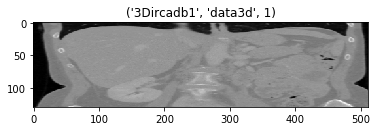

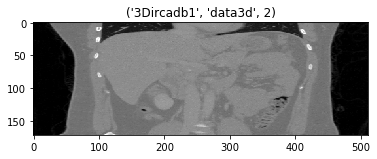

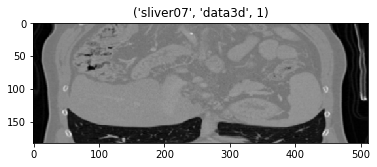

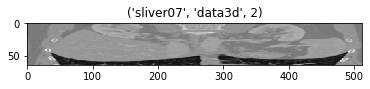

In [2]:
# number of 3d images per dataset
n = 2
for args in itertools.product(
    [
        "3Dircadb1", 
        'sliver07'
    ],
    ["data3d"], 
    range(1, 1 + n)
):
#     print(args)
    datap = io3d.datasets.read_dataset(*args)
    plt.figure()
    plt.imshow(datap.data3d[:,256,:], cmap='gray')
    plt.title(args)
    plt.show()
    

h:\medical\orig\pilsen_pigs\Tx024D_Ven\PATIENT_DICOM


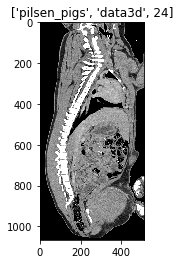

h:\medical\orig\3Dircadb1.1\PATIENT_DICOM


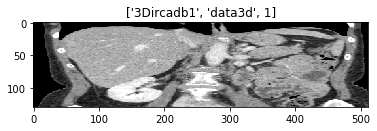

h:\medical\orig\sliver07\training\liver-orig001.mhd


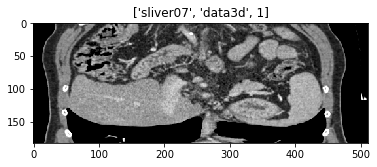

In [3]:
# number of 3d images per dataset
n = 2
for args in (
    [ 'pilsen_pigs', "data3d", 24],
    [ "3Dircadb1", 'data3d', 1],
    [ 'sliver07', "data3d", 1]  
):
#     print(args)
    print(io3d.datasets.get_dataset_path(*args))
    datap = io3d.datasets.read_dataset(*args)
    plt.figure()
    plt.imshow(datap.data3d[:,256,:], cmap='gray', vmin=-160, vmax=240)
    plt.title(args)
    plt.show()
    

In [12]:
import SimpleITK as sitk
im = sitk.ReadImage(r"h:\medical\orig\sliver07\training\liver-orig001.mhd")
im

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014D07018CC0> >

In [15]:
dir(im)

['CopyInformation',
 'EraseMetaData',
 'GetDepth',
 'GetDimension',
 'GetDirection',
 'GetHeight',
 'GetITKBase',
 'GetMetaData',
 'GetMetaDataKeys',
 'GetNumberOfComponentsPerPixel',
 'GetNumberOfPixels',
 'GetOrigin',
 'GetPixel',
 'GetPixelAsComplexFloat64',
 'GetPixelID',
 'GetPixelIDTypeAsString',
 'GetPixelIDValue',
 'GetSize',
 'GetSpacing',
 'GetWidth',
 'HasMetaDataKey',
 'MakeUnique',
 'SetDirection',
 'SetMetaData',
 'SetOrigin',
 'SetPixel',
 'SetPixelAsComplexFloat64',
 'SetSpacing',
 'TransformContinuousIndexToPhysicalPoint',
 'TransformIndexToPhysicalPoint',
 'TransformPhysicalPointToContinuousIndex',
 'TransformPhysicalPointToIndex',
 '__GetPixelAsComplexFloat32__',
 '__GetPixelAsDouble__',
 '__GetPixelAsFloat__',
 '__GetPixelAsInt16__',
 '__GetPixelAsInt32__',
 '__GetPixelAsInt64__',
 '__GetPixelAsInt8__',
 '__GetPixelAsUInt16__',
 '__GetPixelAsUInt32__',
 '__GetPixelAsUInt64__',
 '__GetPixelAsUInt8__',
 '__GetPixelAsVectorFloat32__',
 '__GetPixelAsVectorFloat64__',
 '

In [18]:
im.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

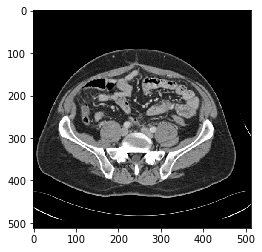

In [13]:
d3d = sitk.GetArrayFromImage(im)
plt.imshow(d3d[0,:,:], cmap='gray', vmin=-160, vmax=240)

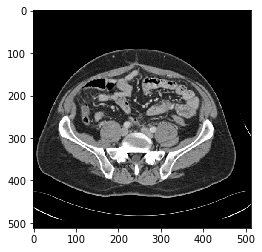

In [14]:
plt.imshow(datap.data3d[0,:,:], cmap='gray', vmin=-160, vmax=240)